#### Objective : To predict primary fuel type and capacity of plant in mega watts.

In this task we need to predict 2 target features using other features like country name, comissioning year, etc.

* 1. we will use capacity_mw as target feature and will use regression models on it as it contains continuous data.

#### Importing various libraries necessary for this task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
power = pd.read_csv('./Downloads/database_IND.csv')

In [3]:
power.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


#### Checking dimensions, description and pressence of null values in dataset.

In [4]:
power.shape

(908, 25)

In [5]:
power.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [6]:
power.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

From the above we can conclude this about data:
* dataset has 908 rows and 25 columns
* description of dataset gives mean, max value, min value, etc of each column of the datset which has continuous data in them.
* There is pressence of null values in 17 columns of dataset out of total 25 columns.

#### Now checking the data type of each and every column of dataset.

In [7]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

By looking at the above information we conclude that 12 columns out of 25 columns have object data type and rest of the columns have float data type.

#### EDA

1. Country

In [8]:
power['country'].unique()

array(['IND'], dtype=object)

As there is only one value in the every row of this column. So we dont need to plot the graph as we cannot conclude any thing from it.

2. country_long

In [9]:
power['country_long'].unique()

array(['India'], dtype=object)

As there is only one value in the every row of this column. So we dont need to plot the graph as we cannot conclude any thing from it.

3. name

In [10]:
power['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

As this column contains name of power plants and there are so many names, so we need to simplify it by refinining the information.

In [11]:
a = []
for i in power['name']:
    i = i[:1]
    a.append(i)

In [12]:
power['name'] = pd.Series(a)

In [13]:
power['name'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', 'i'],
      dtype=object)

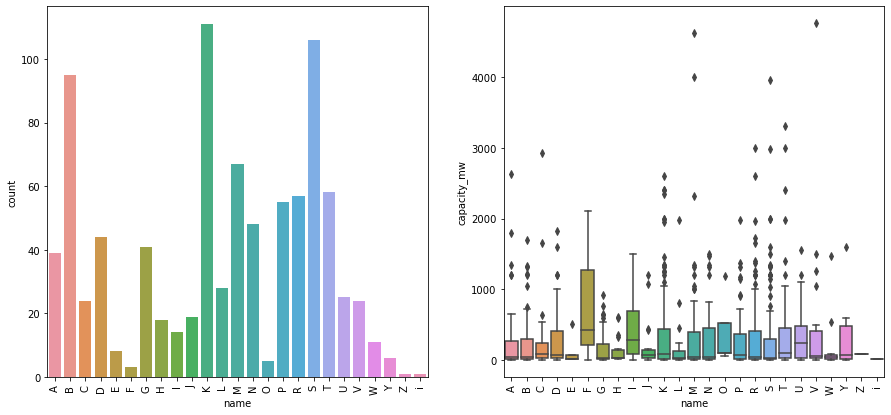

In [14]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(power['name'])
plt.xlabel('name')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'name', y= 'capacity_mw', data= power)
plt.xlabel('name')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both the graphs of name we can conclude that the most number of powerplants have there  name start with K from the countplot and from the boxplot we can conclude that outliers are present in 22 powerplants name out of total 27.

4. gppd_idnr

In [15]:
power['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000018',
       'IND0000019', 'WRI1019905', 'IND0000020', 'IND0000021',
       'IND0000022', 'IND0000023', 'IND0000025', 'IND0000024',
       'WRI1019941', 'WRI1019882', 'IND0000026', 'IND0000027',
       'IND0000028', 'IND0000029', 'IND0000030', 'IND0000031',
       'IND0000032', 'WRI1019883', 'IND0000033', 'IND0000034',
       'IND0000035', 'IND0000036', 'IND0000037', 'IND00

We cannot plot the graph with this much data as it will be jumbled and the we will not be able to gather the information we need to look for. So, we need to make data more refine to gather the information.

In [16]:
ab = []
for i in power['gppd_idnr']:
    i = i[:5]
    ab.append(i)

In [17]:
power['gppd_idnr'] = pd.Series(ab)

In [18]:
power['gppd_idnr'].unique()

array(['WRI10', 'IND00'], dtype=object)

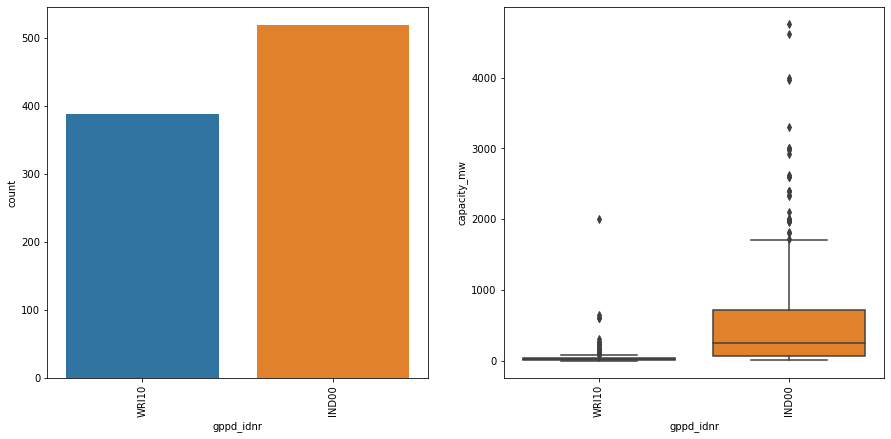

In [19]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(power['gppd_idnr'])
plt.xlabel('gppd_idnr')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'gppd_idnr', y= 'capacity_mw', data= power)
plt.xlabel('gppd_idnr')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both the graphs of gppd_idnr we can conclude that most powerplants have IND00 as their identifiers from the countplot and from the boxplot we can conclude that outliers are present in both categories of gppd_idnr.

5. latitude

In [20]:
power['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 13.0977, 28.506 , 16.2804, 33.1815,
       32.8063, 23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956,
       32.1686, 24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999,
       22.9417, 25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546,
       17.3816, 20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932,
       13.7008, 13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012,
       19.5132, 21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 ,
       18.455 , 18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172,
       24.8263, 22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145,
       21.2083,  9.9

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [21]:
power['latitude']= power['latitude'].fillna(method= 'bfill')

In [22]:
power['latitude'].isnull().sum()

0

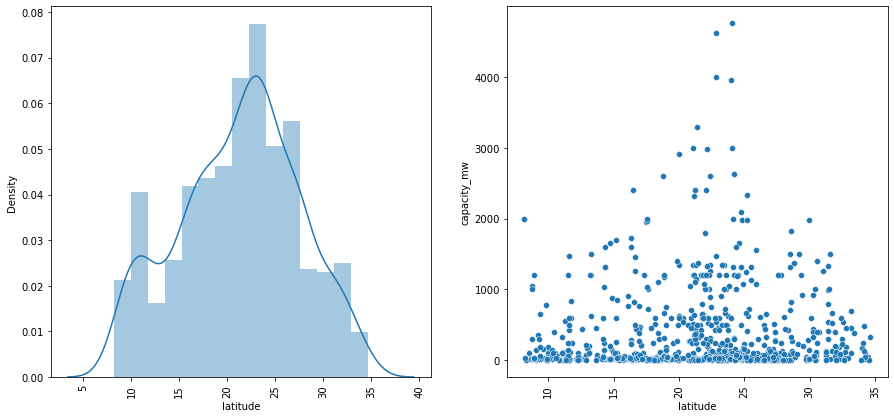

In [23]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(power['latitude'])
plt.xlabel('latitude')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'latitude', y= 'capacity_mw', data= power)
plt.xlabel('latitude')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both the graphs of latitude we can conclude that it is very hard to determine the skewness of the data but data is giving its highest density at around 23 from the distplot and from the scatterplot we can conclude that data is scattered all over but its density is most at around the range between 0 to 50 capacity_mw with almost all range of latitude and data is not giving any sign of any correlation with capacity_mw.

6. longitude.

In [24]:
power['longitude'].unique()

array([73.2407, 74.609 , 69.3732, 91.3602, 82.4091, 68.6447, 77.0078,
       77.207 , 75.8863, 81.6373, 77.9009, 76.4938, 82.8   , 77.8769,
           nan, 82.7891, 76.3188, 81.7841, 81.7865, 76.1851, 74.7061,
       74.9191, 79.5286, 83.2741, 79.1518, 74.2402, 76.3926, 77.687 ,
       73.6396, 77.1893, 76.3482, 71.6917, 71.6918, 71.6916, 80.2695,
       77.3066, 75.225 , 75.3155, 76.1418, 87.4513, 82.1221, 79.3421,
       74.689 , 82.4305, 88.4042, 76.4695, 81.2875, 81.2747, 74.2562,
       83.1889, 91.565 , 86.0218, 79.925 , 85.7452, 79.8066, 73.2   ,
       80.2682, 78.241 , 76.7986, 74.5345, 79.0547, 74.8209, 74.7111,
       76.7909, 77.1036, 76.7195, 75.6373, 75.7131, 76.4328, 79.6311,
       79.7708, 73.8087, 73.7252, 73.4173, 72.2222, 77.758 , 77.8659,
       77.7145, 74.7529, 81.4237, 73.3907, 73.3498, 73.4527, 75.8425,
       74.6216, 78.1606, 78.1336, 73.0901, 83.2058, 76.6537, 81.0333,
       86.0888, 85.88  , 90.5287, 74.1543, 76.3744, 88.14  , 76.532 ,
       78.9535, 78.9

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [25]:
power['longitude'] = power['longitude'].fillna(method= 'bfill')

In [26]:
power['longitude'].isnull().sum()

0

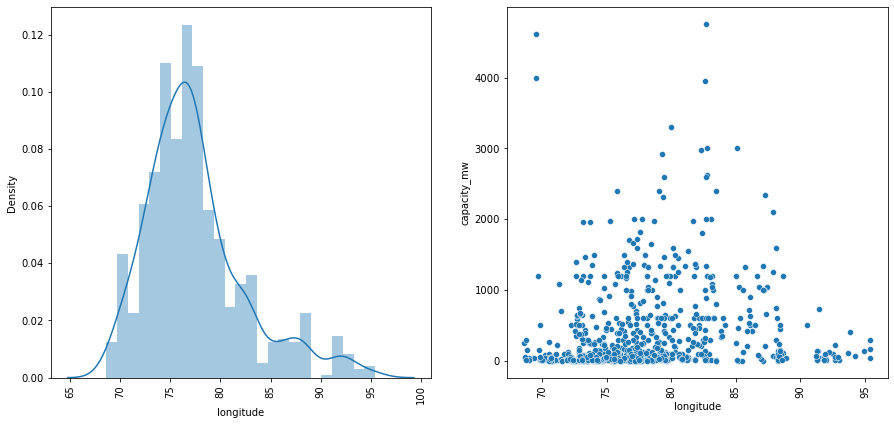

In [27]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(power['longitude'])
plt.xlabel('longitude')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'longitude', y= 'capacity_mw', data= power)
plt.xlabel('longitude')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both the graphs of longitude we can conclude that data is positively skewed with ahving highest density at around 73 from the distplot and from the scatterplot we can conclude this most of powerplants are are generating low capacity_mw at almost all the range of longitude leaving few gaps in between and data is scattered all over and its not giving any correlation with capacity_mw.

7. Primary Fuel.

In [28]:
power['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

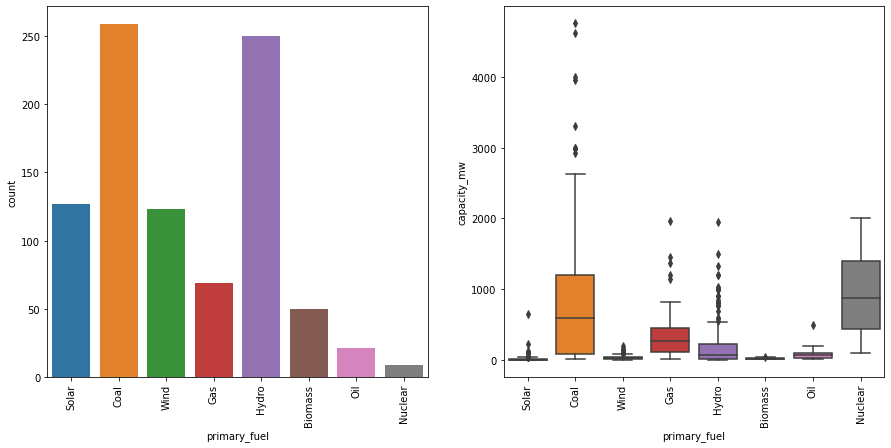

In [29]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(power['primary_fuel'])
plt.xlabel('primary_fuel')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'primary_fuel', y= 'capacity_mw', data= power)
plt.xlabel('primary_fuel')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both graphs of primary_fuel we can conclude that most of powerplants are using coal as their primary_fuel from the countplot and from the boxplot we can conclude that outliers are present in every category of primary_fuel except for Nuclear type powerplants.

8. Otherfuel1

In [30]:
power['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [31]:
power['other_fuel1'] = power['other_fuel1'].fillna(method= 'bfill')

In [32]:
power['other_fuel1'].isnull().sum()

4

In [33]:
power['other_fuel1'] = power['other_fuel1'].fillna(method= 'ffill')

In [34]:
power['other_fuel1'].isnull().sum()

0

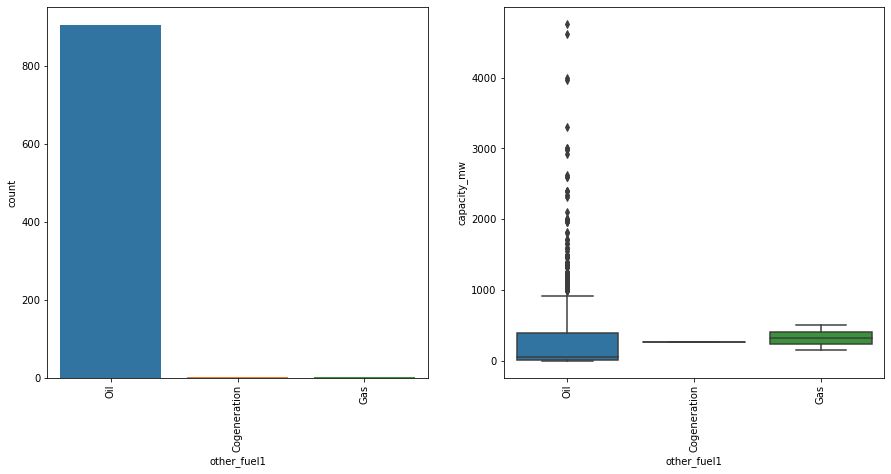

In [35]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(power['other_fuel1'])
plt.xlabel('other_fuel1')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'other_fuel1', y= 'capacity_mw', data= power)
plt.xlabel('other_fuel1')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both the graphs of other_fuel1 we can conclude that most powerplants are chossing oil as the other_fuel1 option from the countplot and from the boxplot we can conclude that outliers are present in only oil category of other_fuel1.

9. other_fuel2

In [36]:
power['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

By looking at the data of this column there are only 2 values present in this column and one of them is null so after filling it up there will be only one value which would be present in the whole column. So, we would not have to plot the graphs as we cannot gather any useful information by doing so.

In [37]:
power['other_fuel2'] = power['other_fuel2'].fillna('Oil')

In [38]:
power['other_fuel2'].isnull().sum()

0

10. other_fuel3

In [39]:
power['other_fuel3'].unique()

array([nan])

As there is only null values present in the is column and we don't have anyother value present in it to fill the null value with. So we can drop this column from the dataset as we cannot gather any information from it.

In [40]:
power.drop(['other_fuel3'], axis= 1, inplace= True)

11. commissioning_year

In [41]:
power['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955.,
       2018., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [42]:
power['commissioning_year'] = power['commissioning_year'].fillna(method= 'bfill')

In [43]:
power['commissioning_year'].isnull().sum()

4

In [44]:
power['commissioning_year'] = power['commissioning_year'].fillna(method= 'ffill')

In [45]:
power['commissioning_year'].isnull().sum()

0

In [46]:
power['commissioning_year'].unique()

array([2011., 2004., 2015., 2005., 1970., 2010., 2008., 2014., 1985.,
       1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980., 2003.,
       1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997., 1999.,
       1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983., 1981.,
       1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955., 2018.,
       2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982., 1937.,
       1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927., 1974.,
       1953.])

In [47]:
power['commissioning_year'] = power['commissioning_year'].replace([2011.,2015.,2014.,2017.,2012.,2016.,2013.,2018.],
                                                                 [2010.,2010.,2010.,2010.,2010.,2010.,2010.,2010.])
power['commissioning_year'] = power['commissioning_year'].replace([2004.,2005.,2008.,2003.,2002.,2001.,2006.,2007.,2009.],
                                                                 [2000.,2000.,2000.,2000.,2000.,2000.,2000.,2000.,2000.])
power['commissioning_year'] = power['commissioning_year'].replace([1998.,1996.,1991.,1993.,1997.,1999.,1994.,1992.,1995.],
                                                                 [1990.,1990.,1990.,1990.,1990.,1990.,1990.,1990.,1990.])
power['commissioning_year'] = power['commissioning_year'].replace([1985.,1986.,1987.,1989.,1984.,1988.,1983.,1981.,1982.],
                                                                 [1980.,1980.,1980.,1980.,1980.,1980.,1980.,1980.,1980.])
power['commissioning_year'] = power['commissioning_year'].replace([1977.,1973.,1975.,1972.,1979.,1978.,1976.,1971.,1974.],
                                                                 [1970.,1970.,1970.,1970.,1970.,1970.,1970.,1970.,1970.])
power['commissioning_year'] = power['commissioning_year'].replace([1968.,1964.,1962.,1967.,1961.,1963.,1966.,1965.,1969.],
                                                                 [1960.,1960.,1960.,1960.,1960.,1960.,1960.,1960.,1960.])
power['commissioning_year'] = power['commissioning_year'].replace([1959.,1957.,1955.,1952.,1956.,1958.,1954.,1953.],
                                                                 [1950.,1950.,1950.,1950.,1950.,1950.,1950.,1950.])
power['commissioning_year'] = power['commissioning_year'].replace([1949.,1946.,1943.],[1940.,1940.,1940.])
power['commissioning_year'] = power['commissioning_year'].replace([1937.,1939.],[1930.,1930.])
power['commissioning_year'] = power['commissioning_year'].replace([1927.],[1920.])

In [48]:
power['commissioning_year'].unique()

array([2010., 2000., 1970., 1980., 1990., 1960., 1950., 1940., 1930.,
       1920.])

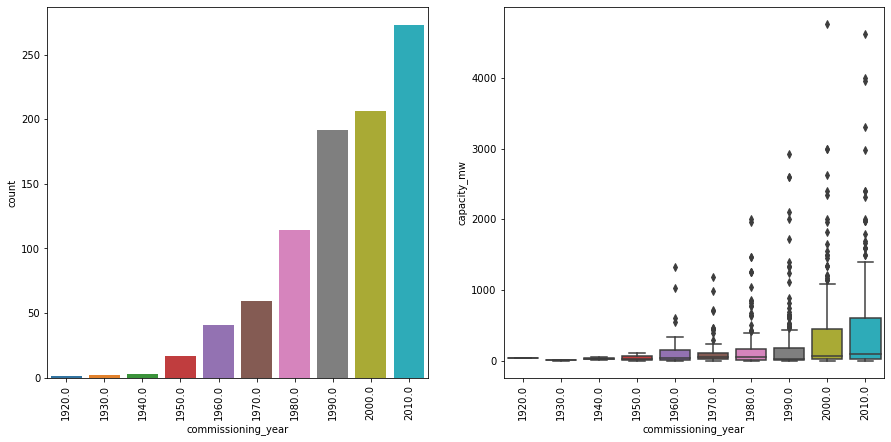

In [49]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(power['commissioning_year'])
plt.xlabel('commissioning_year')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'commissioning_year', y= 'capacity_mw', data= power)
plt.xlabel('commissioning_year')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both the graphs of commissioning_year we can conclude that most number of powerplants were commissioned in 2010's decade from the countplot and from the boxplot we can conclude that outliers are present in 6 categories of commissioning_year out of total 10.

12. owner

In [50]:
power['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [51]:
power['owner'].isnull().sum()

566

In [52]:
power['owner'] = power['owner'].fillna(method= 'bfill')

In [53]:
power['owner'].isnull().sum()

0

In [54]:
ab = []
for i in power['owner']:
    i = i[0]
    ab.append(i)

In [55]:
power['owner'] = pd.Series(ab)

In [56]:
power['owner'].unique()

array(['S', 'U', 'A', 'H', 'D', 'E', 'N', 'M', 'F', 'K', 'V', 'I', 'B',
       'J', 'G', 'O', 'P', 'L', 'R', 'C', 'W', 'Z', 'Y', 'T', 'i'],
      dtype=object)

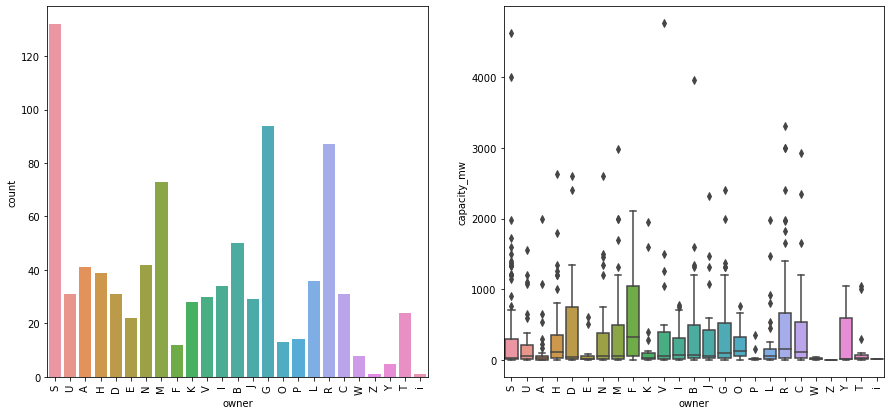

In [57]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(power['owner'])
plt.xlabel('owner')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'owner', y= 'capacity_mw', data= power)
plt.xlabel('owner')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both the graphs of owner we can conclude that most of the powerplants are owned by the owner whose name start with S alphabet from the countplot and from the boxplot we can conclude that outliers are present in 21 categories of owner out of total 25.

13. source

In [58]:
power['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [59]:
ab = []
for i in power['source']:
    i = i[0]
    ab.append(i)

In [60]:
power['source'] = pd.Series(ab)

In [61]:
power['source'].unique()

array(['N', 'U', 'C', 'H', 'D', 'A', 'S', 'M', 'L', 'I', 'B', 'J', 'V',
       'P', 'G', 'R', 'W', 'E', 'O', 'K', 'Y', 'F', 'T'], dtype=object)

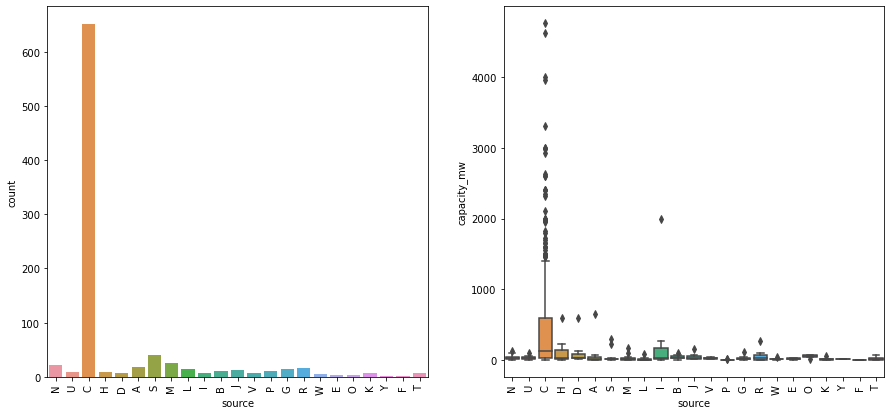

In [62]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(power['source'])
plt.xlabel('source')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'source', y= 'capacity_mw', data= power)
plt.xlabel('source')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both the graphs of source we can conclude that most of the sources who provided information about the powerplants have their name started with C from the countplot and from the boxplot we can conclude that outliers are present in 18 categories of source out of total 23.

14. url

In [63]:
power['url'].unique()

array(['http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=262',
       'http://www.ultratechcement.com/',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1328700673.83/view',
       'http://www.cea.nic.in/', 'http://www.hindustanpowerprojects.com/',
       'http://www.ambedkarsugar.com/',
       'http://www.mapsofindia.com/whitepages/foods-and-beverages/food-processors-and-manufacturers/ashokssklimited',
       'http://www.renukasugars.com/',
       'http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=254',
       'http://www.navbharatbuildcon.com/windmill--solar-plant.html',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1216117082.43/view',
       'http://www.meil.in/power-projects',
       'https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1348755977.79/view',
       'https://cdm.unfccc.int/Projects/DB/BVQI1379744232.36/viewhttps://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1278588174.29/view',
       'http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.p

By looking at data of this column we can see that these are url of all the sources from where all the data in dataset is provided. But I don't think so that it will effect the target column in anyway and we also cannot plot graphs for this information. All we can do about this column is we can drop it.

In [64]:
power.drop(['url'], axis= 1, inplace= True)

15. geolocation_source

In [65]:
power['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [66]:
power['geolocation_source'] = power['geolocation_source'].fillna(method= 'bfill')

In [67]:
power['geolocation_source'].isnull().sum()

0

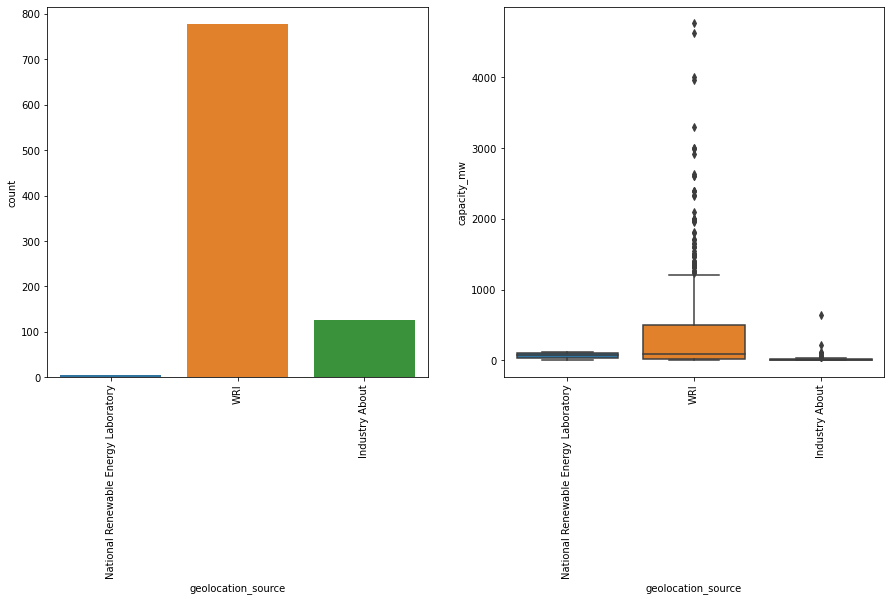

In [68]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(power['geolocation_source'])
plt.xlabel('geolocation_source')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'geolocation_source', y= 'capacity_mw', data= power)
plt.xlabel('geolocation_source')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both graphs of geolocation_source we can conclude that most powerplants present are with WRI geolocation_source from the countplot and from the boxplot we can conclude that outliers are present in WRI and Industry About category of geolocation_source only.

16. wepp_id

In [69]:
power['wepp_id'].unique()

array([nan])

By looking at this column we can see that only value present in this column is null value and we cannot fill with it any other value as there is no other value present in the column to fill null values with it. So only thing we can do is to drop it.

In [70]:
power.drop(['wepp_id'], axis= 1, inplace= True)

17. year_of_capacity_data

In [71]:
power['year_of_capacity_data'].unique()

array([  nan, 2018.])

As there is only 2 values present in the column and one value is null so wwe need to fill the null value with the only other value present in it.

In [72]:
power['year_of_capacity_data'] = power['year_of_capacity_data'].fillna(2018.)

In [73]:
power['year_of_capacity_data'].unique()

array([2018.])

As we can see that there is only one value present in this column and we could not gather any information from it and nor there is no use of plotting the graph for just one value present in whole column.

18. generation_gwh_2013

In [74]:
power['generation_gwh_2013'].unique()

array([           nan, 6.31777928e+02, 1.66829000e+03, 8.21798000e+02,
       1.47568450e+02, 6.96738800e+02, 5.04813250e+02, 2.64232200e+03,
       1.03405000e+03, 7.31334950e+02, 6.39700000e+03, 7.13299500e+03,
       1.91994200e+03, 1.73000000e+03, 0.00000000e+00, 8.04286000e+02,
       3.76900000e+03, 2.78580100e+03, 6.34849800e+02, 6.27422600e+03,
       1.64754090e+03, 1.18871000e+03, 1.65046620e+03, 1.47080900e+02,
       1.23778000e+02, 2.27570000e+00, 2.57835110e+02, 5.44672950e+02,
       4.87135000e+00, 4.48100000e+02, 1.25663600e+03, 8.21705000e-01,
       1.33876255e+03, 2.27506750e+02, 5.65200000e+03, 6.34710500e+01,
       6.17923855e+03, 9.03460000e+01, 8.56894000e+01, 2.49148000e+01,
       4.10935000e+01, 3.31861000e+03, 9.64612700e+02, 9.48732500e+01,
       3.03007350e+02, 4.36099800e+03, 1.42839040e+03, 1.52042000e+03,
       2.79729000e+01, 3.36680000e+02, 5.49337000e+03, 2.20064150e+02,
       4.16100000e+02, 3.30880000e+00, 1.38911950e+03, 2.32916565e+03,
      

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [75]:
power['generation_gwh_2013'] = power['generation_gwh_2013'].fillna(method= 'bfill')

In [76]:
power['generation_gwh_2013'].isnull().sum()

5

In [77]:
power['generation_gwh_2013'] = power['generation_gwh_2013'].fillna(method= 'ffill')

In [78]:
power['generation_gwh_2013'].isnull().sum()  

0

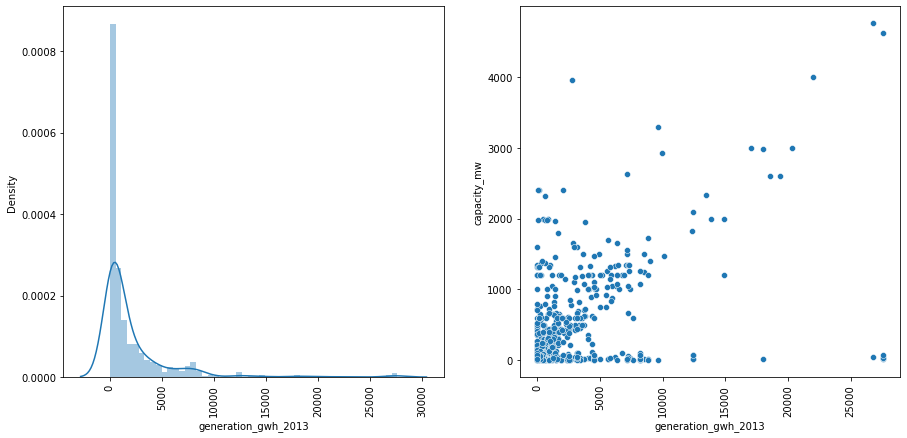

In [79]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(power['generation_gwh_2013'])
plt.xlabel('generation_gwh_2013')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'generation_gwh_2013', y= 'capacity_mw', data= power)
plt.xlabel('generation_gwh_2013')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both the graphs of generation_gwh_2013 we can conclude that data is positively skewed with having high density around 50 or 100 from distplot and from scatterplot we can conclude the data is having somewhat positive correlation with target variable with data being scattered all over.

19. generation_gwh_2014

In [80]:
power['generation_gwh_2014'].unique()

array([           nan, 6.17789264e+02, 3.03555000e+03, 1.15342100e+03,
       1.57558250e+02, 6.74391100e+02, 4.80594950e+02, 1.88790400e+03,
       1.92097100e+03, 6.14412500e+02, 7.74400000e+03, 9.67087900e+03,
       1.61198700e+03, 1.60700000e+03, 0.00000000e+00, 5.73274000e+02,
       2.93600000e+03, 2.92521045e+03, 7.92686650e+02, 7.23528100e+03,
       1.33253385e+03, 9.46141000e+02, 1.07595320e+03, 8.56595500e+01,
       1.20444750e+02, 2.65780000e+02, 3.04832800e+02, 4.95967700e+02,
       1.22100000e+03, 5.05760000e+02, 1.25573200e+03, 2.85387000e+00,
       1.24631710e+03, 2.93534950e+02, 5.44576300e+03, 5.03370500e+01,
       5.24180925e+03, 6.50730000e+01, 1.36872200e+02, 6.75605000e+01,
       2.96272000e+03, 8.32884650e+02, 9.07937500e+01, 2.99176600e+02,
       5.85507000e+03, 2.23699080e+03, 1.43887000e+03, 8.11580000e+00,
       1.45560000e+02, 5.37195000e+03, 2.34650850e+02, 3.30595670e+03,
       3.73919000e+02, 1.49121645e+03, 2.53904100e+03, 1.01567610e+03,
      

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [81]:
power['generation_gwh_2014'] = power['generation_gwh_2014'].fillna(method= 'bfill')

In [82]:
power['generation_gwh_2014'].isnull().sum()

5

In [83]:
power['generation_gwh_2014'] = power['generation_gwh_2014'].fillna(method= 'ffill')

In [84]:
power['generation_gwh_2014'].isnull().sum()

0

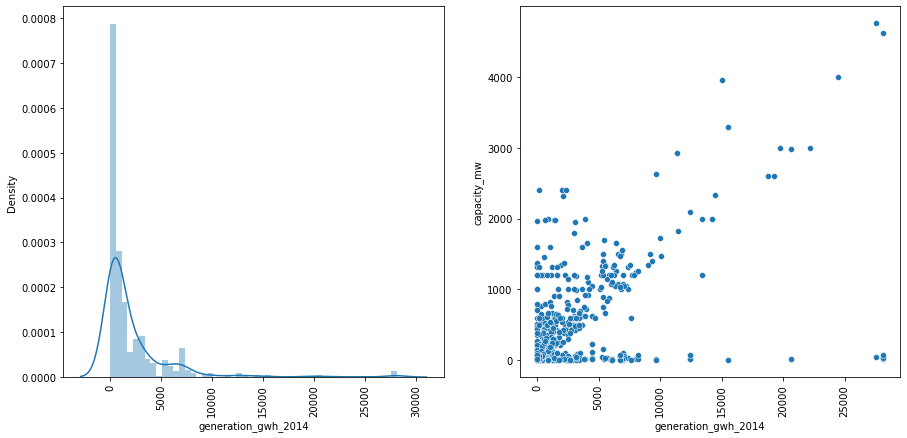

In [85]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(power['generation_gwh_2014'])
plt.xlabel('generation_gwh_2014')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'generation_gwh_2014', y= 'capacity_mw', data= power)
plt.xlabel('generation_gwh_2014')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both the graphs of generation_gwh_2014 we can conclude that data is positively skewed with having high density around 50 or 100 from distplot and from scatterplot we can conclude the data is having somewhat positive correlation with target variable with data being scattered all over.

20. generation_gwh_2015

In [86]:
power['generation_gwh_2015'].unique()

array([           nan, 8.43747000e+02, 5.91637000e+03, 1.20885200e+03,
       1.52195200e+02, 7.21335200e+02, 1.44434200e+02, 1.64304600e+03,
       5.62966300e+03, 6.65197300e+02, 8.07681050e+03, 1.11510695e+04,
       9.09000000e+02, 2.70282320e+03, 1.46500000e+03, 9.86247350e+02,
       0.00000000e+00, 2.01300000e+03, 2.98513930e+03, 5.53220000e+01,
       7.41862050e+02, 5.97912500e+03, 1.43795470e+03, 6.18909900e+02,
       1.96760200e+02, 9.48831000e+02, 5.71607600e+02, 1.06942600e+02,
       3.96806000e+01, 2.31610720e+03, 2.31626436e+02, 3.26459500e+02,
       4.05600000e+03, 3.06379000e+02, 1.16531800e+03, 8.29591247e+00,
       1.29797750e+03, 3.14320500e+02, 5.74131900e+03, 3.98796000e+01,
       5.86315690e+03, 8.21372500e+01, 6.99485000e+00, 5.65160000e+00,
       1.55727450e+02, 3.26358400e+03, 6.37138300e+02, 7.35006500e+01,
       1.95935400e+02, 7.50597200e+03, 1.20406750e+03, 2.80500000e-01,
       1.63427400e+03, 1.06579200e+02, 1.28899000e+01, 3.41720000e+00,
      

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [87]:
power['generation_gwh_2015'] = power['generation_gwh_2015'].fillna(method= 'bfill')

In [88]:
power['generation_gwh_2015'].isnull().sum()

4

In [89]:
power['generation_gwh_2015'] = power['generation_gwh_2015'].fillna(method= 'ffill')

In [90]:
power['generation_gwh_2015'].isnull().sum()

0

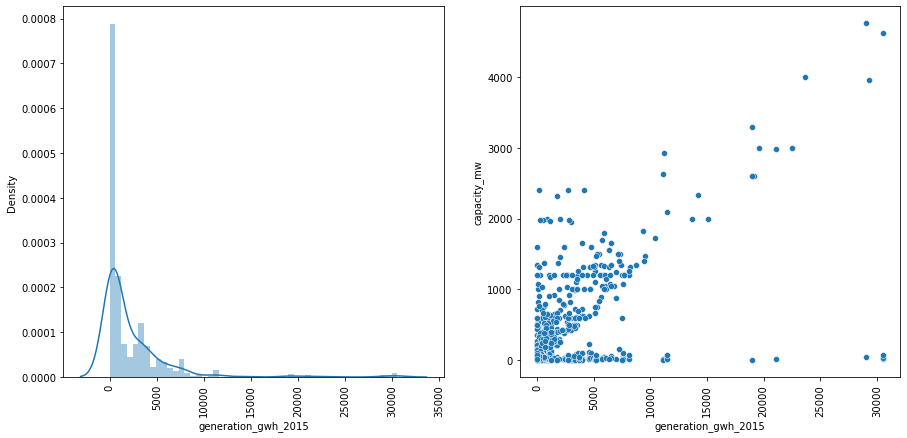

In [91]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(power['generation_gwh_2015'])
plt.xlabel('generation_gwh_2015')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'generation_gwh_2015', y= 'capacity_mw', data= power)
plt.xlabel('generation_gwh_2015')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both the graphs of generation_gwh_2015 we can conclude that data is positively skewed with having high density around 50 or 100 from distplot and from scatterplot we can conclude the data is having somewhat positive correlation with target variable with data being scattered all over.

21. generation_gwh_2016

In [92]:
power['generation_gwh_2016'].unique()

array([           nan, 8.86004428e+02, 6.24300000e+03, 1.17576500e+03,
       6.14213500e+01, 6.75724400e+02, 4.02029750e+02, 1.33809300e+03,
       1.70100800e+03, 6.70500650e+02, 7.90202160e+03, 1.32273523e+04,
       6.66420000e+02, 3.51574960e+03, 5.09000000e+02, 2.83200000e+02,
       0.00000000e+00, 1.51100000e+03, 2.17363720e+03, 1.75018510e+03,
       6.65983350e+02, 6.34120200e+03, 2.80000000e+03, 9.96373100e+02,
       1.29033000e+03, 1.66863100e+03, 1.23282490e+03, 1.09181350e+02,
       5.32126000e+01, 6.77378800e+03, 1.87193669e+02, 1.20903640e+02,
       4.43242650e+02, 7.17700000e+03, 3.54900000e+02, 1.27499900e+03,
       1.04689800e+01, 1.33603625e+03, 2.96271200e+02, 5.99932000e+03,
       2.69247000e+01, 5.14242865e+03, 4.68844000e+01, 4.99230000e+01,
       1.97308500e+01, 1.73826500e+01, 2.04870500e+01, 3.37910050e+03,
       9.46871850e+02, 1.01072100e+02, 2.05557050e+02, 5.66607190e+03,
       7.39155400e+02, 1.91560000e+02, 1.27252000e+03, 5.11710000e+00,
      

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [93]:
power['generation_gwh_2016'] = power['generation_gwh_2016'].fillna(method= 'bfill')

In [94]:
power['generation_gwh_2016'].isnull().sum()

4

In [95]:
power['generation_gwh_2016'] = power['generation_gwh_2016'].fillna(method= 'ffill')

In [96]:
power['generation_gwh_2016'].isnull().sum()

0

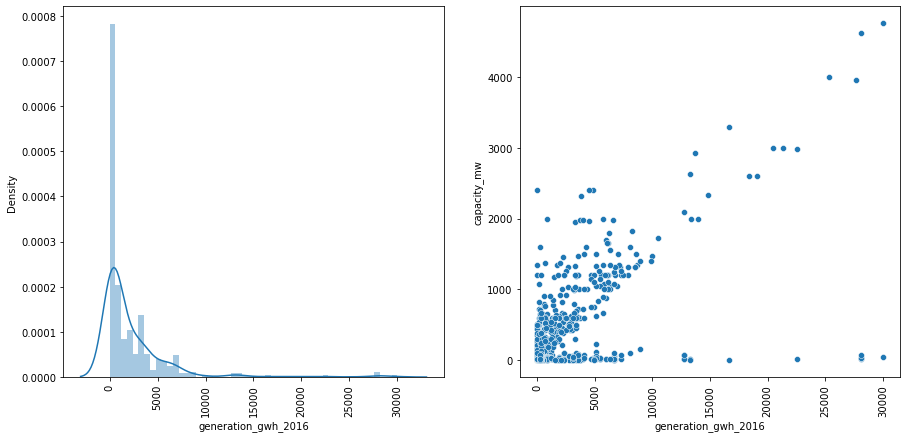

In [97]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(power['generation_gwh_2016'])
plt.xlabel('generation_gwh_2016')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'generation_gwh_2016', y= 'capacity_mw', data= power)
plt.xlabel('generation_gwh_2016')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both the graphs of generation_gwh_2016 we can conclude that data is positively skewed with having high density around 50 or 100 from distplot and from scatterplot we can conclude the data is having somewhat positive correlation with target variable with data being scattered all over.

22. generation_gwh_2017

In [98]:
power['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       0.00000000e+00, 1.39500000e+03, 2.49417645e+03, 1.81284025e+03,
       6.38521350e+02, 6.77925600e+03, 2.12068000e+03, 1.46980405e+03,
       2.01879000e+03, 1.71320100e+03, 5.42643150e+02, 5.58394000e+01,
       6.84560000e+01, 6.15376000e+03, 1.78106690e+02, 3.47098000e+01,
       1.58254750e+02, 8.77800000e+03, 1.71355000e+02, 1.43607200e+03,
       5.85771000e+00, 1.32996675e+03, 3.13594150e+02, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [99]:
power['generation_gwh_2017'] = power['generation_gwh_2017'].fillna(method= 'bfill')

In [100]:
power['generation_gwh_2017'].isnull().sum()

4

In [101]:
power['generation_gwh_2017'] = power['generation_gwh_2017'].fillna(method= 'ffill')

In [102]:
power['generation_gwh_2017'].isnull().sum()

0

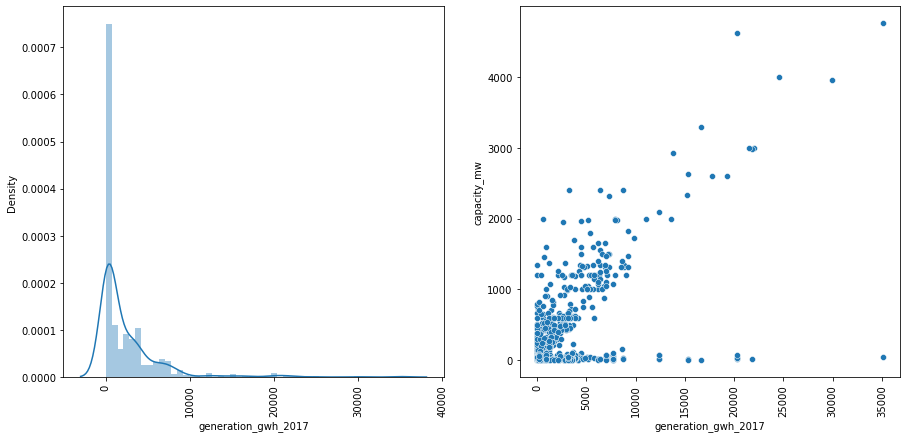

In [103]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(power['generation_gwh_2017'])
plt.xlabel('generation_gwh_2017')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'generation_gwh_2017', y= 'capacity_mw', data= power)
plt.xlabel('generation_gwh_2017')
plt.xticks(rotation= 90)
plt.ylabel('capacity_mw')
plt.show()

By looking at both the graphs of generation_gwh_2017 we can conclude that data is positively skewed with having high density around 50 or 100 from distplot and from scatterplot we can conclude the data is having somewhat positive correlation with target variable with data being scattered all over.

23. generation_data_source

In [104]:
power['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

As there are only 2 values present in the whole column and one value is null value so we need to fill null value using the other value and after that we will be only having one value in this column. So, we don't need to plot any graph for it as we cannot gather any information by plotting the graph.

In [105]:
power['generation_data_source'] = power['generation_data_source'].fillna('Central Electricity Authority')

24. estimated_generation_gwh

In [106]:
power['estimated_generation_gwh'].unique()

array([nan])

As there is only null value present in this column so we can drop it.

In [107]:
power.drop(['estimated_generation_gwh'], axis= 1, inplace= True)

#### So now changing the data types of every column to int or float data type

In [108]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                908 non-null    float64
 6   longitude               908 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   other_fuel1             908 non-null    object 
 9   other_fuel2             908 non-null    object 
 10  commissioning_year      908 non-null    float64
 11  owner                   908 non-null    object 
 12  source                  908 non-null    object 
 13  geolocation_source      908 non-null    object 
 14  year_of_capacity_data   908 non-null    fl

In [109]:
power['country'].unique()

array(['IND'], dtype=object)

In [110]:
power['country'] = power['country'].replace(['IND'],[1])

In [111]:
power['country_long'].unique()

array(['India'], dtype=object)

In [112]:
power['country_long'] = power['country_long'].replace(['India'],[1])

In [113]:
power['name'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', 'i'],
      dtype=object)

In [114]:
power['name'] = power['name'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
                                       'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', 'i'],
                                     np.arange(0,25))

In [115]:
power['gppd_idnr'].unique()

array(['WRI10', 'IND00'], dtype=object)

In [116]:
power['gppd_idnr'] = power['gppd_idnr'].replace(['WRI10', 'IND00'],[0,1])

In [117]:
power['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [118]:
power['primary_fuel'] = power['primary_fuel'].replace(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
                                                       'Nuclear'], np.arange(0,8))

In [119]:
power['other_fuel1'].unique()

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

In [120]:
power['other_fuel1'] = power['other_fuel1'].replace(['Oil', 'Cogeneration', 'Gas'],
                                                   [0,1,2])

In [121]:
power['other_fuel2'].unique()

array(['Oil'], dtype=object)

In [122]:
power['other_fuel2'] = power['other_fuel2'].replace(['Oil'],[1])

In [123]:
power['owner'].unique()

array(['S', 'U', 'A', 'H', 'D', 'E', 'N', 'M', 'F', 'K', 'V', 'I', 'B',
       'J', 'G', 'O', 'P', 'L', 'R', 'C', 'W', 'Z', 'Y', 'T', 'i'],
      dtype=object)

In [124]:
power['owner'] = power['owner'].replace(['S', 'U', 'A', 'H', 'D', 'E', 'N', 'M', 'F', 'K', 'V', 'I', 'B',
                                         'J', 'G', 'O', 'P', 'L', 'R', 'C', 'W', 'Z', 'Y', 'T', 'i'],
                                         np.arange(0,25))

In [125]:
power['source'].unique()

array(['N', 'U', 'C', 'H', 'D', 'A', 'S', 'M', 'L', 'I', 'B', 'J', 'V',
       'P', 'G', 'R', 'W', 'E', 'O', 'K', 'Y', 'F', 'T'], dtype=object)

In [126]:
power['source'] = power['source'].replace(['N', 'U', 'C', 'H', 'D', 'A', 'S', 'M', 'L', 'I', 'B', 'J', 'V',
                                           'P', 'G', 'R', 'W', 'E', 'O', 'K', 'Y', 'F', 'T'],
                                           np.arange(0,23))

In [127]:
power['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [128]:
power['geolocation_source'] = power['geolocation_source'].replace(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],[0,1,2])

In [129]:
power['generation_data_source'].unique()

array(['Central Electricity Authority'], dtype=object)

In [130]:
power['generation_data_source'] = power['generation_data_source'].replace(['Central Electricity Authority'],[1])

In [131]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    int64  
 1   country_long            908 non-null    int64  
 2   name                    908 non-null    int32  
 3   gppd_idnr               908 non-null    int64  
 4   capacity_mw             908 non-null    float64
 5   latitude                908 non-null    float64
 6   longitude               908 non-null    float64
 7   primary_fuel            908 non-null    int32  
 8   other_fuel1             908 non-null    int64  
 9   other_fuel2             908 non-null    int64  
 10  commissioning_year      908 non-null    float64
 11  owner                   908 non-null    int32  
 12  source                  908 non-null    int32  
 13  geolocation_source      908 non-null    int64  
 14  year_of_capacity_data   908 non-null    fl

#### Now after changing the data type of every column to int or float we can plot heatmap to check correlation of every column with target column.

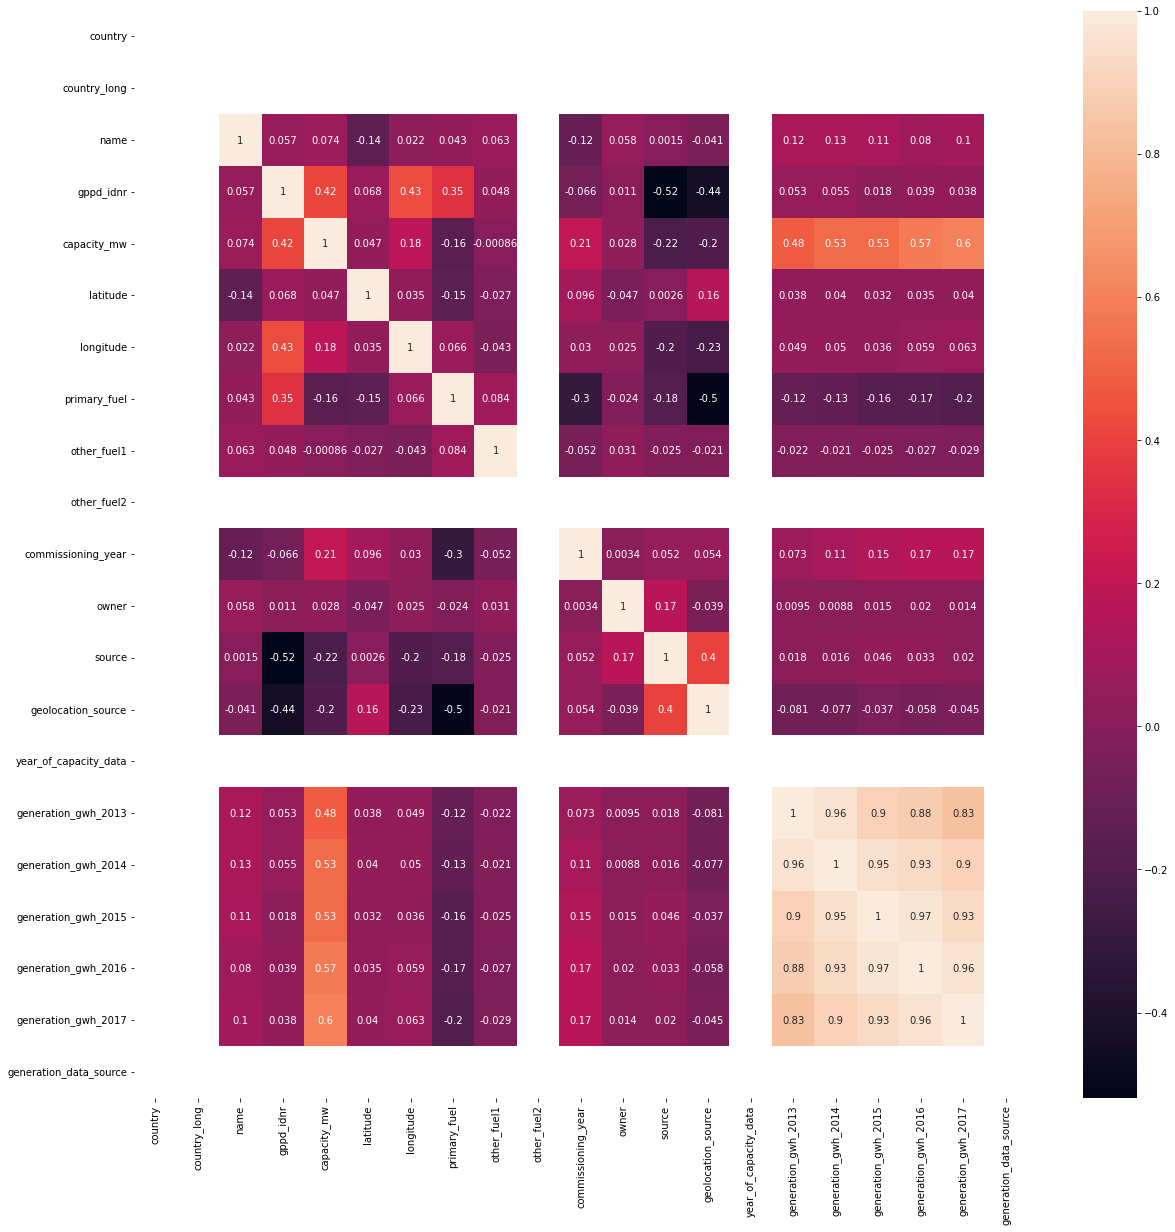

In [132]:
plt.figure(figsize= [20,20])
sns.heatmap(power.corr(), annot= True)
plt.show()

As we can see from the heatmap that few columns are giving whole white line strip and not showing any correlation with any other column. So, we can drop those columns. Apart from that columns like (generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, commissioning_year, longitude and gppd_idnr) having high positive correlation with target column capacity_mw and columns like (geolocation_source, source and primary_fuel) having high negative correlation with target column capacity_mw. So, now we need to drop some columns to remove multi collinearity.

In [133]:
power.drop(['country','country_long','other_fuel2','year_of_capacity_data','generation_data_source','owner', 'latitude','name'], axis= 1, inplace= True)

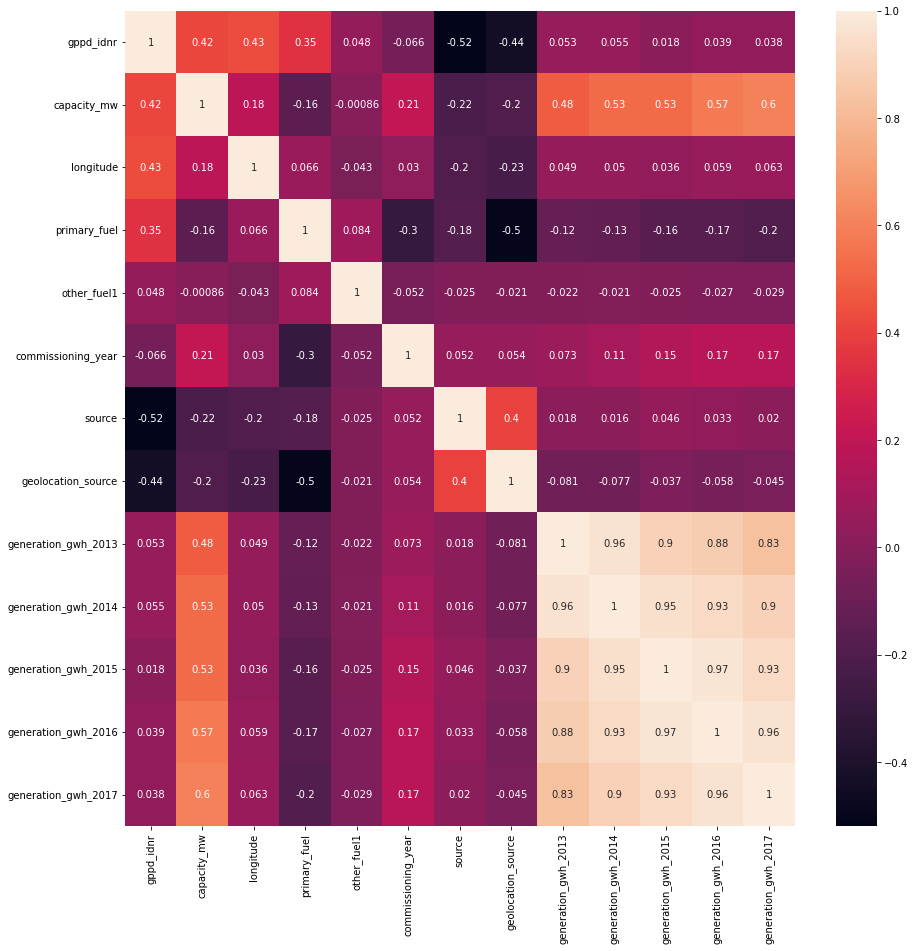

In [134]:
plt.figure(figsize= [15,15])
sns.heatmap(power.corr(), annot= True)
plt.show()

#### Now after removing some column the data has become much refined and now we can apply model to check which model is most suited for this dataset.

1. Linear Regression Model

In [135]:
X = power.drop(['capacity_mw'], axis= 1)
y = power['capacity_mw']

In [136]:
lr = LinearRegression()
scaler = StandardScaler()
trainaccuracy = []
testaccuracy = []
for i in range(1,25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    lr.fit(scaledX_train, y_train)
    trainaccuracy.append(lr.score(scaledX_train, y_train))
    testaccuracy.append(lr.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.5773129943984548
test accuracy :  0.5182353203828695


2. Decision Tree Regression Model

In [137]:
dt = DecisionTreeRegressor()
for i in range(1,25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    dt.fit(scaledX_train, y_train)
    trainaccuracy.append(dt.score(scaledX_train, y_train))
    testaccuracy.append(dt.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.788656248288298
test accuracy :  0.5698229573027046


3. Random Forest Regression Model

In [138]:
rf = RandomForestRegressor()
for i in range(1,25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    rf.fit(scaledX_train, y_train)
    trainaccuracy.append(rf.score(scaledX_train, y_train))
    testaccuracy.append(rf.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.8473520711744084
test accuracy :  0.6343980160723577


4. Bagging Regression Model

In [139]:
br = BaggingRegressor(base_estimator= DecisionTreeRegressor())
for i in range(1,25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    br.fit(scaledX_train, y_train)
    trainaccuracy.append(br.score(scaledX_train, y_train))
    testaccuracy.append(br.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.8735842890624412
test accuracy :  0.6606279069981981


#### Out of all the 4 models Bagging Regression giving the best accuracy score but still it is giving much higher training score then testing score. But we have to go with this model. Also we need to scale the data before to remove the outliers.

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1)

In [141]:
br = BaggingRegressor(base_estimator= DecisionTreeRegressor())

In [142]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [143]:
pred = br.fit(scaledX_train, y_train).predict(scaledX_test)

In [144]:
df = pd.DataFrame({'Actual': y_test, 'Prediction': np.round(pred, 1)})
df.head()

,Actual,Prediction
685,105.7,72.7
255,36.0,27.9
868,1500.0,1201.0
142,10.0,79.0
641,12.5,36.7


In [145]:
print('r2 score : ', metrics.r2_score(y_test, pred))

r2 score :  0.7961787233733918


In [146]:
print('rmse : ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

rmse :  300.63268666124276


In [147]:
print('mae : ', metrics.mean_absolute_error(y_test, pred))

mae :  150.90011644640236


#### Now as we can see that from various metrics that this model is giving pretty high r2_score in the final use as compare to in the comparison phase with other model. So it is safe to say that this model is working greatly on this dataset. Now we need to save it before moving forward with 2nd target column. 

In [148]:
save_r = pickle.dumps(br)

* 2. We will use Primary_fuel as target column and will use classification model on it on the basis of other columns like country, source, etc.

#### Importing various libraries necessary for this task to be completed.

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [150]:
p = pd.read_csv('./Downloads/database_IND.csv')

#### We don't need to check for the dimensions description or pressence of the null values as we already know about them by working previously on dataset for another target feature. We can also drop the useless columns from this dataset again before beginning of the EDA as it will make the task more easy. The only difference is that from this dataset longitude column will get dropped instead of latitude as we can observe from the above heatmap.

In [151]:
p.drop(['country','country_long','other_fuel2','year_of_capacity_data','generation_data_source','owner', 'longitude','name'], axis= 1, inplace= True)

In [152]:
p.columns

Index(['gppd_idnr', 'capacity_mw', 'latitude', 'primary_fuel', 'other_fuel1',
       'other_fuel3', 'commissioning_year', 'source', 'url',
       'geolocation_source', 'wepp_id', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'estimated_generation_gwh'],
      dtype='object')

In [153]:
p.isnull().sum()

gppd_idnr                     0
capacity_mw                   0
latitude                     46
primary_fuel                  0
other_fuel1                 709
other_fuel3                 908
commissioning_year          380
source                        0
url                           0
geolocation_source           19
wepp_id                     908
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
estimated_generation_gwh    908
dtype: int64

In [154]:
p.drop(['other_fuel3','wepp_id','estimated_generation_gwh'], axis= 1, inplace= True)

We have to drop these columns too as in them there were only null values present in them. Now we can begin the EDA

#### EDA

1. gppd_idnr

In [155]:
p['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000018',
       'IND0000019', 'WRI1019905', 'IND0000020', 'IND0000021',
       'IND0000022', 'IND0000023', 'IND0000025', 'IND0000024',
       'WRI1019941', 'WRI1019882', 'IND0000026', 'IND0000027',
       'IND0000028', 'IND0000029', 'IND0000030', 'IND0000031',
       'IND0000032', 'WRI1019883', 'IND0000033', 'IND0000034',
       'IND0000035', 'IND0000036', 'IND0000037', 'IND00

In [156]:
ab = []
for i in p['gppd_idnr']:
    i = i[:5]
    ab.append(i)

In [157]:
p['gppd_idnr'] = pd.Series(ab)

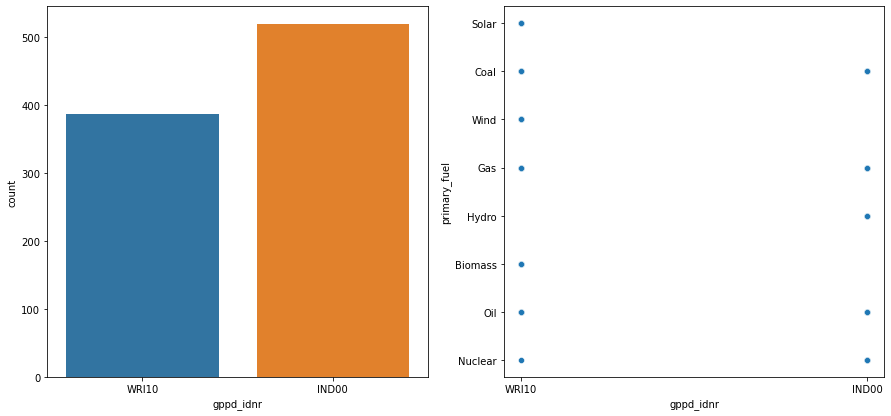

In [158]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(p['gppd_idnr'])
plt.xlabel('gppd_idnr')
plt.subplot(222)
sns.scatterplot(x= 'gppd_idnr', y= 'primary_fuel', data= p)
plt.xlabel('gppd_idnr')
plt.ylabel('primary_fuel')
plt.show()

By looking at both graphs of gppd_idnr we can conclude that most powerplants present are with IND00 gppd_idnr code from the countplot and from the scatterplot powerplant with IND00 gppd_idnr code have every category of primary_fuel powerplant in them except Biomass, Wind and Solar in them and powerplant with WRI10 gppd_idnr code have every category of primary_fuel powerplant in them except Hydro.

2. capacity_mw

In [159]:
p['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       2.00000e+02, 7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02,
       1.05000e+03, 5.10000e+02, 6.75000e+01, 3.00000e+02, 4.55000e+02,
       1.20000e+01, 3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01,
       7.20000e+02, 9.00000e+01, 1.32000e+03, 1.20000e+02, 6.40000e+01,
       2.70000e+02, 2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01,
       1.70000e+03, 4.10000e+01, 1.32500e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 4.00000e+01, 1.65000e+02, 7.500

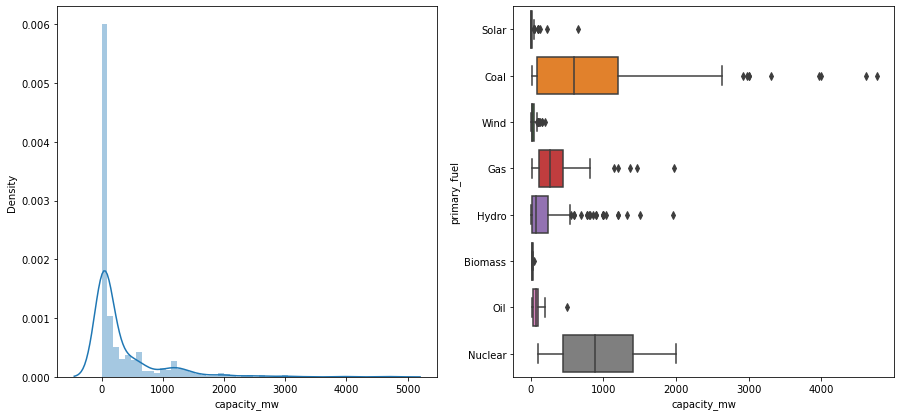

In [160]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(p['capacity_mw'])
plt.xlabel('capacity_mw')
plt.subplot(222)
sns.boxplot(x= 'capacity_mw', y= 'primary_fuel', data= p)
plt.xlabel('capacity_mw')
plt.ylabel('primary_fuel')
plt.show()

By looking at both the graphs of capacity_mw we can conclude that data is positively skewed with having highest density around 25 or 50 from distplot and from the boxplot we can conclude that ooutliers are present in every category of primary_fuel except Nuclear.

3. latitude

In [161]:
p['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 13.0977, 28.506 , 16.2804, 33.1815,
       32.8063, 23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956,
       32.1686, 24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999,
       22.9417, 25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546,
       17.3816, 20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932,
       13.7008, 13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012,
       19.5132, 21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 ,
       18.455 , 18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172,
       24.8263, 22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145,
       21.2083,  9.9

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [162]:
p['latitude'] = p['latitude'].fillna(method= 'bfill')

In [163]:
p['latitude'].isnull().sum()

0

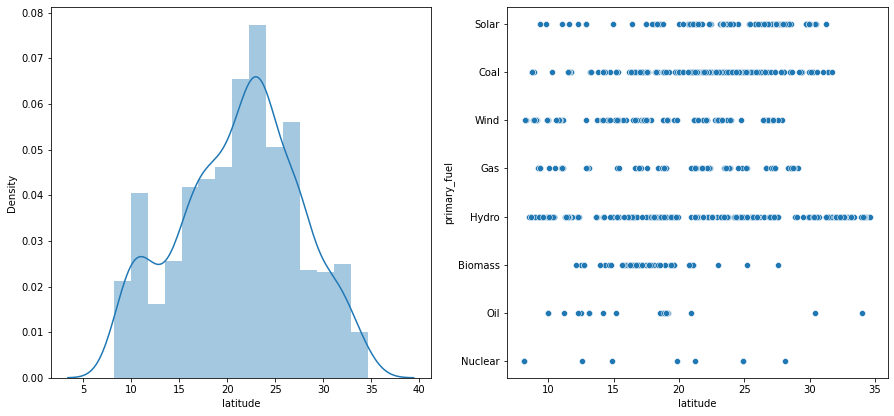

In [164]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(p['latitude'])
plt.xlabel('latitude')
plt.subplot(222)
sns.scatterplot(x= 'latitude', y= 'primary_fuel', data= p)
plt.xlabel('latitude')
plt.ylabel('primary_fuel')
plt.show()

By looking at both the graphs of latitude we can conclude that we cannot determine the skewness of the data but data is having the highest density around 23 from the distplot and from the scatterplot we can conclude that Hydro powerplant has been placed at most range of latitude and Nuclear powerplant hasbeen place at least range of the latitude and oil powerplant has been placed almost all range of latitude except in between range 23 & 31.

4. other_fuel1

In [165]:
p['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [166]:
p['other_fuel1'] = p['other_fuel1'].fillna(method= 'bfill')

In [167]:
p['other_fuel1'].isnull().sum()

4

In [168]:
p['other_fuel1'] = p['other_fuel1'].fillna(method= 'ffill')

In [169]:
p['other_fuel1'].isnull().sum()

0

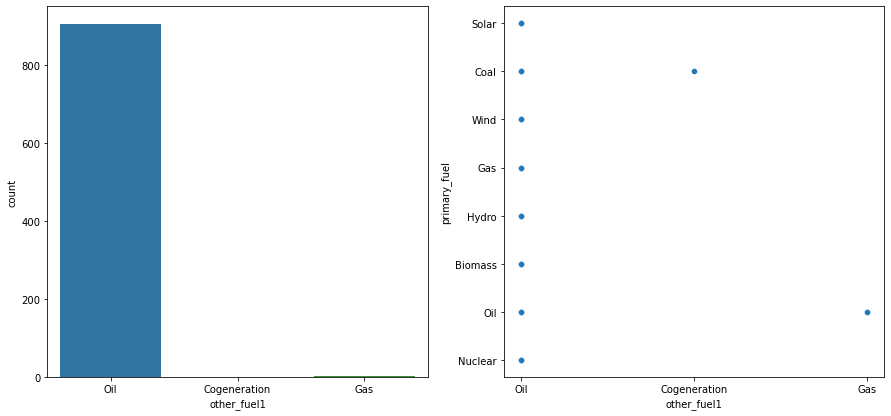

In [170]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(p['other_fuel1'])
plt.xlabel('other_fuel1')
plt.subplot(222)
sns.scatterplot(x= 'other_fuel1', y= 'primary_fuel', data= p)
plt.xlabel('other_fuel1')
plt.ylabel('primary_fuel')
plt.show()

By looking at both graphs of other_fuel1 we can conclude that most of the powerplants are using Oil as other_fuel1 in them from countplot and from the scatterplot we can conclude that every category of primary_fuel powerplant are using Oil as other_fuel1 . Also Powerplant with Oil Primary_fuel in them are using Gas as other_fuel1 in them and Powerplant with Coal primary_fuel are using Cogeneration as other_fuel1 in them.

5. commissioning_year

In [171]:
p['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955.,
       2018., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [172]:
p['commissioning_year'] = p['commissioning_year'].fillna(method= 'bfill')

In [173]:
p['commissioning_year'].isnull().sum()

4

In [174]:
p['commissioning_year'] = p['commissioning_year'].fillna(method= 'ffill')

In [175]:
p['commissioning_year'].isnull().sum()

0

In [176]:
p['commissioning_year'].unique()

array([2011., 2004., 2015., 2005., 1970., 2010., 2008., 2014., 1985.,
       1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980., 2003.,
       1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997., 1999.,
       1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983., 1981.,
       1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955., 2018.,
       2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982., 1937.,
       1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927., 1974.,
       1953.])

In [177]:
p['commissioning_year'] = p['commissioning_year'].replace([2011.,2015.,2014.,2017.,2012.,2016.,2013.,2018.],
                                                          [2010.,2010.,2010.,2010.,2010.,2010.,2010.,2010.])
p['commissioning_year'] = p['commissioning_year'].replace([2004.,2005.,2008.,2003.,2002.,2001.,2006.,2007.,2009.],
                                                          [2000.,2000.,2000.,2000.,2000.,2000.,2000.,2000.,2000.])
p['commissioning_year'] = p['commissioning_year'].replace([1998.,1996.,1991.,1993.,1997.,1999.,1994.,1992.,1995.],
                                                          [1990.,1990.,1990.,1990.,1990.,1990.,1990.,1990.,1990.])
p['commissioning_year'] = p['commissioning_year'].replace([1985.,1986.,1987.,1989.,1984.,1988.,1983.,1981.,1982.],
                                                          [1980.,1980.,1980.,1980.,1980.,1980.,1980.,1980.,1980.])
p['commissioning_year'] = p['commissioning_year'].replace([1977.,1973.,1975.,1972.,1979.,1978.,1976.,1971.,1974.],
                                                          [1970.,1970.,1970.,1970.,1970.,1970.,1970.,1970.,1970.])
p['commissioning_year'] = p['commissioning_year'].replace([1968.,1964.,1962.,1967.,1961.,1963.,1966.,1965.,1969.],
                                                          [1960.,1960.,1960.,1960.,1960.,1960.,1960.,1960.,1960.])
p['commissioning_year'] = p['commissioning_year'].replace([1959.,1957.,1955.,1952.,1956.,1958.,1954.,1953.],
                                                          [1950.,1950.,1950.,1950.,1950.,1950.,1950.,1950.])
p['commissioning_year'] = p['commissioning_year'].replace([1949.,1946.,1943.],[1940.,1940.,1940.])
p['commissioning_year'] = p['commissioning_year'].replace([1937.,1939.],[1930.,1930.])
p['commissioning_year'] = p['commissioning_year'].replace([1927.],[1920.])

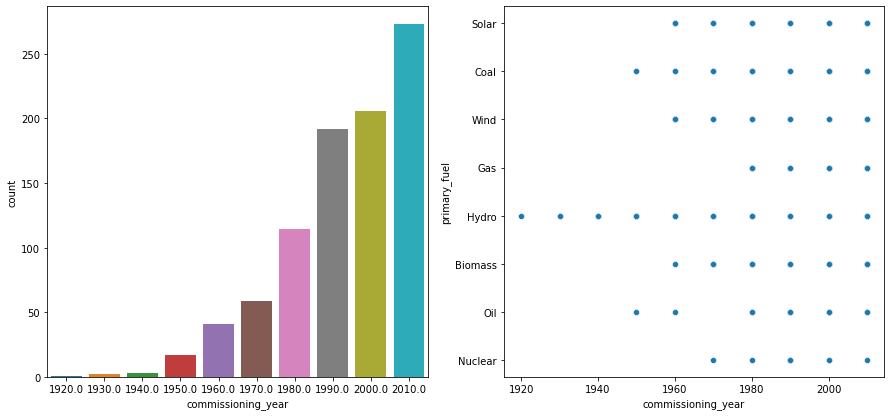

In [178]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(p['commissioning_year'])
plt.xlabel('commissioning_year')
plt.subplot(222)
sns.scatterplot(x= 'commissioning_year', y= 'primary_fuel', data= p)
plt.xlabel('commissioning_year')
plt.ylabel('primary_fuel')
plt.show()

By looking at both the graph of commissioning_year we can conclude that most number of powerplants are commission in 2010's decade from the countplot and from the scatterplot we can conclude that Hydropowerplants were started to get commissioned from 1920's, Oil and coal powerplants started to commissioned from 1950's, wind, Biomass and solar powerplants started to get commissioned from 1960's and Nuclear powerplant started to get commissioned from 1970's.

6. source

In [179]:
p['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [180]:
ab = []
for i in p['source']:
    i = i[0]
    ab.append(i)

In [181]:
p['source'] = pd.Series(ab)

In [182]:
p['source'].unique()

array(['N', 'U', 'C', 'H', 'D', 'A', 'S', 'M', 'L', 'I', 'B', 'J', 'V',
       'P', 'G', 'R', 'W', 'E', 'O', 'K', 'Y', 'F', 'T'], dtype=object)

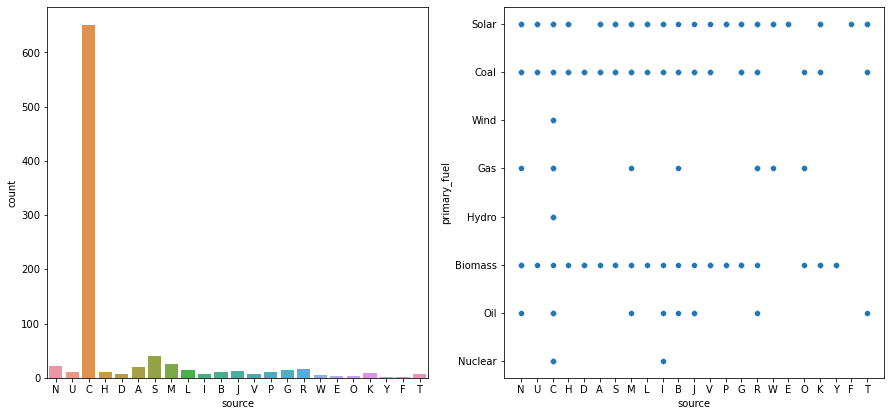

In [183]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(p['source'])
plt.xlabel('source')
plt.subplot(222)
sns.scatterplot(x= 'source', y= 'primary_fuel', data= p)
plt.xlabel('source')
plt.ylabel('primary_fuel')
plt.show()

By looking at both the graphs of source we can conclude that most powerplant's information comes from the source whose name start with C from the countplot and from the scatterplot we can conclude that Nuclear powerplant information comes from C & I source, Oil powerplant informmation comes from N, C, M, I, B, J, R and T source, Biomass powerplant information comes from almost all sources except W, E, F & T, Hydro powerplants information comes from only source C, Gas poiwerplant information comes from N, C, M, B, R, W & O source, wind powerplant information comes from only C source, Coal powerplant information comes from almost all sources except G, W, E, Y & F sources and Solar powerplant's information comes from almost all sources except D, O & Y sources.

7. url

In [184]:
p['url'].unique()

array(['http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=262',
       'http://www.ultratechcement.com/',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1328700673.83/view',
       'http://www.cea.nic.in/', 'http://www.hindustanpowerprojects.com/',
       'http://www.ambedkarsugar.com/',
       'http://www.mapsofindia.com/whitepages/foods-and-beverages/food-processors-and-manufacturers/ashokssklimited',
       'http://www.renukasugars.com/',
       'http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=254',
       'http://www.navbharatbuildcon.com/windmill--solar-plant.html',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1216117082.43/view',
       'http://www.meil.in/power-projects',
       'https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1348755977.79/view',
       'https://cdm.unfccc.int/Projects/DB/BVQI1379744232.36/viewhttps://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1278588174.29/view',
       'http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.p

As discussed above we don't need this column as it does not help in anyway or affect the targetr feature. So, we can drop it.

In [185]:
p.drop(['url'], axis= 1, inplace= True)

8. geolocation_source

In [186]:
p['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [187]:
p['geolocation_source'] = p['geolocation_source'].fillna(method= 'bfill')

In [188]:
p['geolocation_source'].isnull().sum()

0

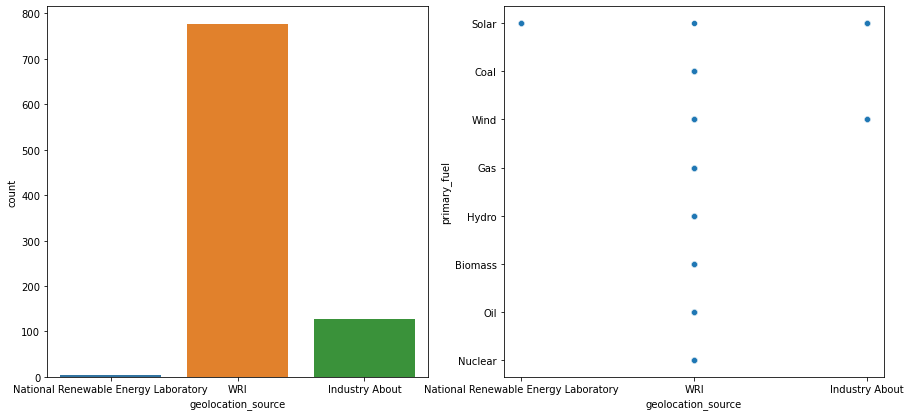

In [189]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(p['geolocation_source'])
plt.xlabel('geolocation_source')
plt.subplot(222)
sns.scatterplot(x= 'geolocation_source', y= 'primary_fuel', data= p)
plt.xlabel('geolocation_source')
plt.ylabel('primary_fuel')
plt.show()

By looking at both the graphs of geolocation_source we can conclude that most number of powerplant have WRI geolocation_source from the countplot and from the scatterplot we can conclude that Solar powerplants is using all three types of geolocation_source, wind powerplant is using WRI and Industry About geolocation source. Other then that all other types of powerplants are using only WRI geolocation_source.

9. generation_gwh_2013

In [190]:
p['generation_gwh_2013'].unique()

array([           nan, 6.31777928e+02, 1.66829000e+03, 8.21798000e+02,
       1.47568450e+02, 6.96738800e+02, 5.04813250e+02, 2.64232200e+03,
       1.03405000e+03, 7.31334950e+02, 6.39700000e+03, 7.13299500e+03,
       1.91994200e+03, 1.73000000e+03, 0.00000000e+00, 8.04286000e+02,
       3.76900000e+03, 2.78580100e+03, 6.34849800e+02, 6.27422600e+03,
       1.64754090e+03, 1.18871000e+03, 1.65046620e+03, 1.47080900e+02,
       1.23778000e+02, 2.27570000e+00, 2.57835110e+02, 5.44672950e+02,
       4.87135000e+00, 4.48100000e+02, 1.25663600e+03, 8.21705000e-01,
       1.33876255e+03, 2.27506750e+02, 5.65200000e+03, 6.34710500e+01,
       6.17923855e+03, 9.03460000e+01, 8.56894000e+01, 2.49148000e+01,
       4.10935000e+01, 3.31861000e+03, 9.64612700e+02, 9.48732500e+01,
       3.03007350e+02, 4.36099800e+03, 1.42839040e+03, 1.52042000e+03,
       2.79729000e+01, 3.36680000e+02, 5.49337000e+03, 2.20064150e+02,
       4.16100000e+02, 3.30880000e+00, 1.38911950e+03, 2.32916565e+03,
      

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [191]:
p['generation_gwh_2013'] = p['generation_gwh_2013'].fillna(method= 'bfill')

In [192]:
p['generation_gwh_2013'].isnull().sum()

5

In [193]:
p['generation_gwh_2013'] = p['generation_gwh_2013'].fillna(method= 'ffill')

In [194]:
p['generation_gwh_2013'].isnull().sum()

0

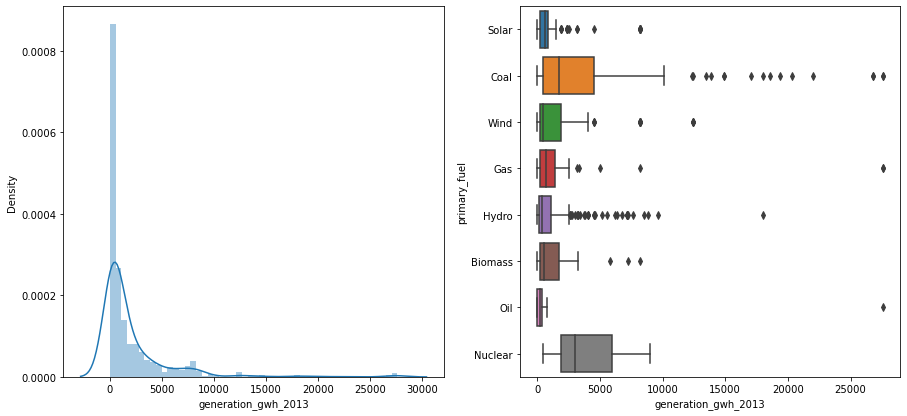

In [195]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(p['generation_gwh_2013'])
plt.xlabel('generation_gwh_2013')
plt.subplot(222)
sns.boxplot(x= 'generation_gwh_2013', y= 'primary_fuel', data= p)
plt.xlabel('generation_gwh_2013')
plt.ylabel('primary_fuel')
plt.show()

By looking at both the graphs of generation_gwh_2013 we can conclude that data is positively skewed with having highest density around 50 or 100 from the distplot and from the boxplot we can conclude that outliers are present in every category of primary_fuel except for Nuclear.

10. generation_gwh_2014

In [196]:
p['generation_gwh_2014'].unique()

array([           nan, 6.17789264e+02, 3.03555000e+03, 1.15342100e+03,
       1.57558250e+02, 6.74391100e+02, 4.80594950e+02, 1.88790400e+03,
       1.92097100e+03, 6.14412500e+02, 7.74400000e+03, 9.67087900e+03,
       1.61198700e+03, 1.60700000e+03, 0.00000000e+00, 5.73274000e+02,
       2.93600000e+03, 2.92521045e+03, 7.92686650e+02, 7.23528100e+03,
       1.33253385e+03, 9.46141000e+02, 1.07595320e+03, 8.56595500e+01,
       1.20444750e+02, 2.65780000e+02, 3.04832800e+02, 4.95967700e+02,
       1.22100000e+03, 5.05760000e+02, 1.25573200e+03, 2.85387000e+00,
       1.24631710e+03, 2.93534950e+02, 5.44576300e+03, 5.03370500e+01,
       5.24180925e+03, 6.50730000e+01, 1.36872200e+02, 6.75605000e+01,
       2.96272000e+03, 8.32884650e+02, 9.07937500e+01, 2.99176600e+02,
       5.85507000e+03, 2.23699080e+03, 1.43887000e+03, 8.11580000e+00,
       1.45560000e+02, 5.37195000e+03, 2.34650850e+02, 3.30595670e+03,
       3.73919000e+02, 1.49121645e+03, 2.53904100e+03, 1.01567610e+03,
      

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [197]:
p['generation_gwh_2014'] = p['generation_gwh_2014'].fillna(method= 'bfill')
p['generation_gwh_2014'] = p['generation_gwh_2014'].fillna(method= 'ffill')

In [198]:
p['generation_gwh_2014'].isnull().sum()

0

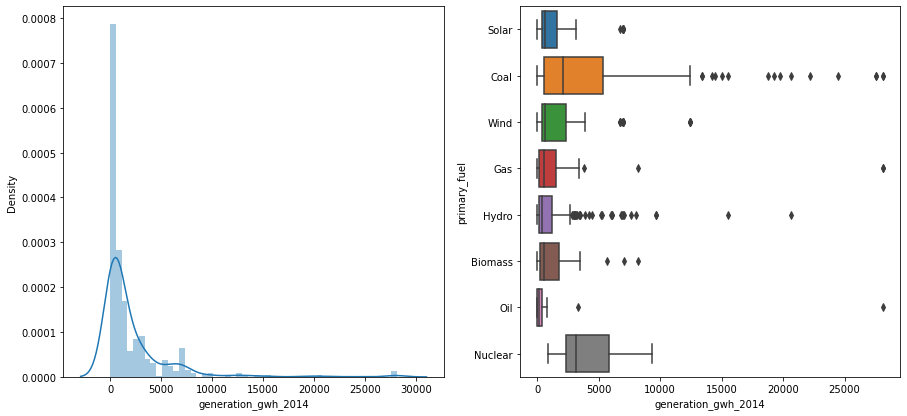

In [199]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(p['generation_gwh_2014'])
plt.xlabel('generation_gwh_2014')
plt.subplot(222)
sns.boxplot(x= 'generation_gwh_2014', y= 'primary_fuel', data= p)
plt.xlabel('generation_gwh_2014')
plt.ylabel('primary_fuel')
plt.show()

By looking at both the graphs of generation_gwh_2014 we can conclude that data is positively skewed with having highest density around 50 or 100 from the distplot and from the boxplot we can conclude that outliers are present in every category of primary_fuel except for Nuclear.

11. generation_gwh_2015

In [200]:
p['generation_gwh_2015'].unique()

array([           nan, 8.43747000e+02, 5.91637000e+03, 1.20885200e+03,
       1.52195200e+02, 7.21335200e+02, 1.44434200e+02, 1.64304600e+03,
       5.62966300e+03, 6.65197300e+02, 8.07681050e+03, 1.11510695e+04,
       9.09000000e+02, 2.70282320e+03, 1.46500000e+03, 9.86247350e+02,
       0.00000000e+00, 2.01300000e+03, 2.98513930e+03, 5.53220000e+01,
       7.41862050e+02, 5.97912500e+03, 1.43795470e+03, 6.18909900e+02,
       1.96760200e+02, 9.48831000e+02, 5.71607600e+02, 1.06942600e+02,
       3.96806000e+01, 2.31610720e+03, 2.31626436e+02, 3.26459500e+02,
       4.05600000e+03, 3.06379000e+02, 1.16531800e+03, 8.29591247e+00,
       1.29797750e+03, 3.14320500e+02, 5.74131900e+03, 3.98796000e+01,
       5.86315690e+03, 8.21372500e+01, 6.99485000e+00, 5.65160000e+00,
       1.55727450e+02, 3.26358400e+03, 6.37138300e+02, 7.35006500e+01,
       1.95935400e+02, 7.50597200e+03, 1.20406750e+03, 2.80500000e-01,
       1.63427400e+03, 1.06579200e+02, 1.28899000e+01, 3.41720000e+00,
      

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [201]:
p['generation_gwh_2015'] = p['generation_gwh_2015'].fillna(method= 'bfill')
p['generation_gwh_2015'] = p['generation_gwh_2015'].fillna(method= 'ffill')

In [202]:
p['generation_gwh_2015'].isnull().sum()

0

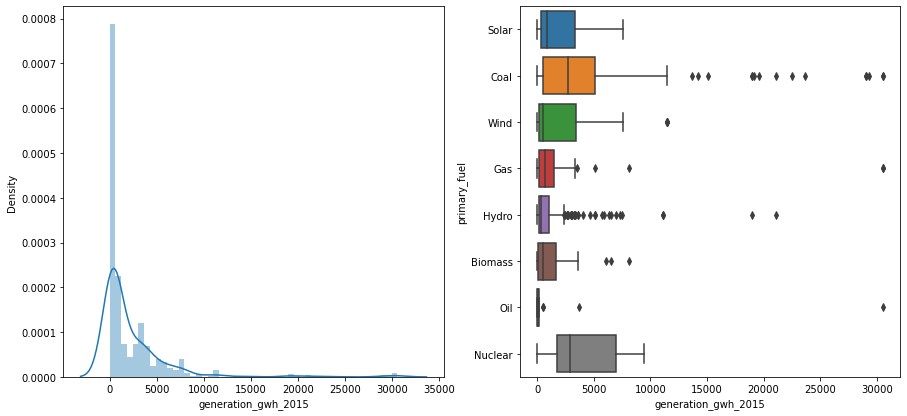

In [203]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(p['generation_gwh_2015'])
plt.xlabel('generation_gwh_2015')
plt.subplot(222)
sns.boxplot(x= 'generation_gwh_2015', y= 'primary_fuel', data= p)
plt.xlabel('generation_gwh_2015')
plt.ylabel('primary_fuel')
plt.show()

By looking at both the graphs of generation_gwh_2015 we can conclude that data is positively skewed with having highest density around 50 or 100 from the distplot and from the boxplot we can conclude that outliers are present in every category of primary_fuel except for Nuclear & Solar.

12. generation_gwh_2016

In [204]:
p['generation_gwh_2016'].unique()

array([           nan, 8.86004428e+02, 6.24300000e+03, 1.17576500e+03,
       6.14213500e+01, 6.75724400e+02, 4.02029750e+02, 1.33809300e+03,
       1.70100800e+03, 6.70500650e+02, 7.90202160e+03, 1.32273523e+04,
       6.66420000e+02, 3.51574960e+03, 5.09000000e+02, 2.83200000e+02,
       0.00000000e+00, 1.51100000e+03, 2.17363720e+03, 1.75018510e+03,
       6.65983350e+02, 6.34120200e+03, 2.80000000e+03, 9.96373100e+02,
       1.29033000e+03, 1.66863100e+03, 1.23282490e+03, 1.09181350e+02,
       5.32126000e+01, 6.77378800e+03, 1.87193669e+02, 1.20903640e+02,
       4.43242650e+02, 7.17700000e+03, 3.54900000e+02, 1.27499900e+03,
       1.04689800e+01, 1.33603625e+03, 2.96271200e+02, 5.99932000e+03,
       2.69247000e+01, 5.14242865e+03, 4.68844000e+01, 4.99230000e+01,
       1.97308500e+01, 1.73826500e+01, 2.04870500e+01, 3.37910050e+03,
       9.46871850e+02, 1.01072100e+02, 2.05557050e+02, 5.66607190e+03,
       7.39155400e+02, 1.91560000e+02, 1.27252000e+03, 5.11710000e+00,
      

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [205]:
p['generation_gwh_2016'] = p['generation_gwh_2016'].fillna(method= 'bfill')
p['generation_gwh_2016'] = p['generation_gwh_2016'].fillna(method= 'ffill')

In [206]:
p['generation_gwh_2016'].isnull().sum()

0

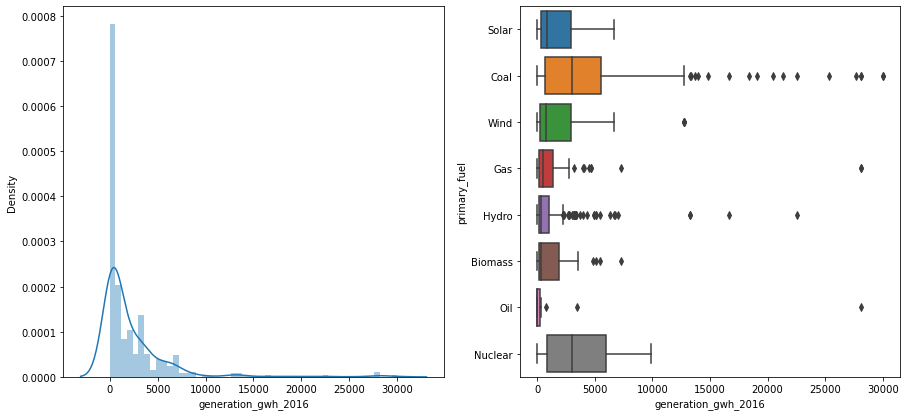

In [207]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(p['generation_gwh_2016'])
plt.xlabel('generation_gwh_2016')
plt.subplot(222)
sns.boxplot(x= 'generation_gwh_2016', y= 'primary_fuel', data= p)
plt.xlabel('generation_gwh_2016')
plt.ylabel('primary_fuel')
plt.show()

By looking at both the graphs of generation_gwh_2016 we can conclude that data is positively skewed with having highest density around 50 or 100 from the distplot and from the boxplot we can conclude that outliers are present in every category of primary_fuel except for Nuclear & Solar.

13. generation_gwh_2017

In [208]:
p['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       0.00000000e+00, 1.39500000e+03, 2.49417645e+03, 1.81284025e+03,
       6.38521350e+02, 6.77925600e+03, 2.12068000e+03, 1.46980405e+03,
       2.01879000e+03, 1.71320100e+03, 5.42643150e+02, 5.58394000e+01,
       6.84560000e+01, 6.15376000e+03, 1.78106690e+02, 3.47098000e+01,
       1.58254750e+02, 8.77800000e+03, 1.71355000e+02, 1.43607200e+03,
       5.85771000e+00, 1.32996675e+03, 3.13594150e+02, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

As we can see that there is a pressence of null values. So, we need to fill those before plotting the graph and we need to fill them with random ways because if we fill them with a common value then data will get biased.

In [209]:
p['generation_gwh_2017'] = p['generation_gwh_2017'].fillna(method= 'bfill')
p['generation_gwh_2017'] = p['generation_gwh_2017'].fillna(method= 'ffill')

In [210]:
p['generation_gwh_2017'].isnull().sum()

0

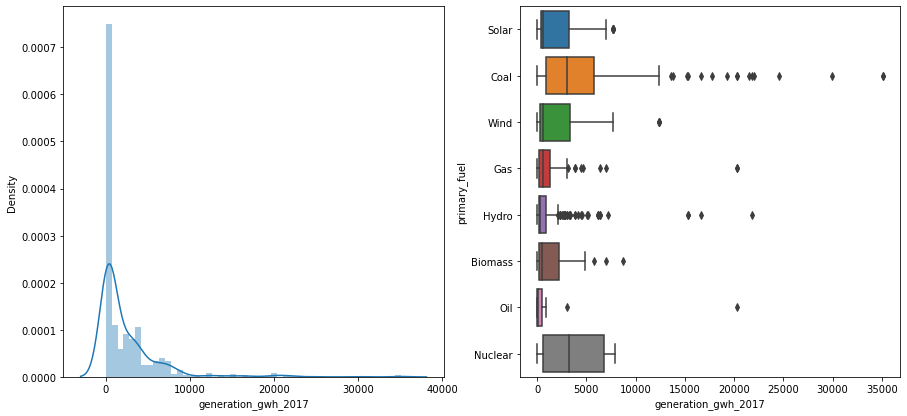

In [211]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(p['generation_gwh_2017'])
plt.xlabel('generation_gwh_2017')
plt.subplot(222)
sns.boxplot(x= 'generation_gwh_2017', y= 'primary_fuel', data= p)
plt.xlabel('generation_gwh_2017')
plt.ylabel('primary_fuel')
plt.show()

By looking at both the graphs of generation_gwh_2017 we can conclude that data is positively skewed with having highest density around 50 or 100 from the distplot and from the boxplot we can conclude that outliers are present in every category of primary_fuel except for Nuclear.

#### Now we need to change data types of every column to int or float data type

In [212]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gppd_idnr            908 non-null    object 
 1   capacity_mw          908 non-null    float64
 2   latitude             908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   other_fuel1          908 non-null    object 
 5   commissioning_year   908 non-null    float64
 6   source               908 non-null    object 
 7   geolocation_source   908 non-null    object 
 8   generation_gwh_2013  908 non-null    float64
 9   generation_gwh_2014  908 non-null    float64
 10  generation_gwh_2015  908 non-null    float64
 11  generation_gwh_2016  908 non-null    float64
 12  generation_gwh_2017  908 non-null    float64
dtypes: float64(8), object(5)
memory usage: 92.3+ KB


In [213]:
p['gppd_idnr'].unique()

array(['WRI10', 'IND00'], dtype=object)

In [214]:
p['gppd_idnr'] = p['gppd_idnr'].replace(['WRI10', 'IND00'],[0,1])

In [215]:
p['other_fuel1'].unique()

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

In [216]:
p['other_fuel1'] = p['other_fuel1'].replace(['Oil', 'Cogeneration', 'Gas'],[0,1,2])

In [217]:
p['source'].unique()

array(['N', 'U', 'C', 'H', 'D', 'A', 'S', 'M', 'L', 'I', 'B', 'J', 'V',
       'P', 'G', 'R', 'W', 'E', 'O', 'K', 'Y', 'F', 'T'], dtype=object)

In [218]:
p['source'] = p['source'].replace(['N', 'U', 'C', 'H', 'D', 'A', 'S', 'M', 'L', 'I', 'B', 'J', 'V',
                                   'P', 'G', 'R', 'W', 'E', 'O', 'K', 'Y', 'F', 'T'], np.arange(0,23))

In [219]:
p['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [220]:
p['geolocation_source'] = p['geolocation_source'].replace(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
                                                         [0,1,2])

In [221]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gppd_idnr            908 non-null    int64  
 1   capacity_mw          908 non-null    float64
 2   latitude             908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   other_fuel1          908 non-null    int64  
 5   commissioning_year   908 non-null    float64
 6   source               908 non-null    int32  
 7   geolocation_source   908 non-null    int64  
 8   generation_gwh_2013  908 non-null    float64
 9   generation_gwh_2014  908 non-null    float64
 10  generation_gwh_2015  908 non-null    float64
 11  generation_gwh_2016  908 non-null    float64
 12  generation_gwh_2017  908 non-null    float64
dtypes: float64(8), int32(1), int64(3), object(1)
memory usage: 88.8+ KB


#### Now splitting the data and checking various models to find best suited model for this dataset.

In [222]:
X = p.drop(['primary_fuel'], axis= 1)
y = p['primary_fuel']

1. Logistic Regression Model

In [224]:
lm = LogisticRegression()
for i in range(1,25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    lm.fit(scaledX_train, y_train)
    trainaccuracy.append(lm.score(scaledX_train, y_train))
    testaccuracy.append(lm.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.8514494185235703
test accuracy :  0.6771073182564146


2. Decision Tree Classification Model

In [225]:
dtc = DecisionTreeClassifier(criterion= 'entropy')
for i in range(1,25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    dtc.fit(scaledX_train, y_train)
    trainaccuracy.append(dtc.score(scaledX_train, y_train))
    testaccuracy.append(dtc.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.8762078487696419
test accuracy :  0.6926212478372715


3. Random Forest Classification Model

In [226]:
rfc = RandomForestClassifier(criterion= 'entropy')
for i in range(1,25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    rfc.fit(scaledX_train, y_train)
    trainaccuracy.append(rfc.score(scaledX_train, y_train))
    testaccuracy.append(rfc.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.893883701155043
test accuracy :  0.7096025631766502


In [227]:
bc = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion= 'entropy'))
for i in range(1,25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    bc.fit(scaledX_train, y_train)
    trainaccuracy.append(bc.score(scaledX_train, y_train))
    testaccuracy.append(bc.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.9056798097294584
test accuracy :  0.7221549960835337


By looking at all the models performance the Bagging classifier is giving the best result but its score for train data is much highest compare to test data but we have to go with it.

#### Now before applying it we need to scale the data for outliers removal.

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 10)

In [229]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [230]:
bc = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion= 'entropy'))

In [231]:
pre = bc.fit(scaledX_train, y_train).predict(scaledX_test)

In [232]:
df1 = pd.DataFrame({'Actual': y_test, 'Prediction': pre})
df1.head()

,Actual,Prediction
529,Coal,Coal
92,Hydro,Hydro
593,Hydro,Hydro
809,Coal,Coal
396,Wind,Wind


#### Now Checking the models performance by applying various metrics on it

In [233]:
print('accuracy score : ', metrics.accuracy_score(y_test, pre))

accuracy score :  0.788546255506608


In [234]:
print('confusion matrix : ')
metrics.confusion_matrix(y_test, pre)

confusion matrix : 


array([[ 5,  1,  0,  0,  0,  2,  0,  1],
       [ 4, 46,  3,  1,  0,  1,  0,  1],
       [ 2,  8,  5,  6,  0,  0,  0,  0],
       [ 0,  5,  1, 59,  0,  0,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0],
       [ 1,  1,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  4, 35]], dtype=int64)

In [236]:
print('cohen kappa score : ', metrics.cohen_kappa_score(y_test, pre))

cohen kappa score :  0.733483354939706


#### By checking performance of model on metrics we can see that model is performing quite well on the dataset. So now we need to save the model.

In [237]:
save_c = pickle.dumps(bc)

#### Hence we have done prediction for both target variables and have achieved best suited models for both target features and have completed the task.